# Análise dos dados da Copa do Mundo
Com base nos dados da Wikipedia, vamos obter informações sobre o público pagante em cada final

link = https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA

In [1]:
import pandas as pd
import requests

#URL 
url = 'https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA'
#Requisitando a página
resposta = requests.get(url)

# Obtendo a resposta em formato HTML
table = pd.read_html(resposta.text)

table

[                                                    0  \
 0                                  Copa do Mundo FIFA   
 1                                                 NaN   
 2                                        Dados gerais   
 3                                         Organização   
 4                                             Edições   
 5                                    Local de disputa   
 6                                             Sistema   
 7   Dados históricos  Primeiro vencedor  Uruguai (...   
 8                                    Dados históricos   
 9                                   Primeiro vencedor   
 10                                    Último vencedor   
 11  Estatísticas  Total de gol(o)s 2 548  Total de...   
 12                                       Estatísticas   
 13                                   Total de gol(o)s   
 14                                     Total de jogos   
 15                                              Média   
 16           

In [2]:
# Obtendo apenas a tebela com os pagantes por final (tabela 12 nos dados retornados)
df = table[11]

df.head()

,0,1,2,3,4
0,Edição,Ano,Estádio,Local,Público pagante
1,I,1930,Estádio Centenário,Montevidéu,68.346
2,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
3,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
4,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850


In [3]:
# Mudar o nome das colunas usando a primeira linha
df.columns = df.iloc[0]

df.head()

,Edição,Ano,Estádio,Local,Público pagante
0,Edição,Ano,Estádio,Local,Público pagante
1,I,1930,Estádio Centenário,Montevidéu,68.346
2,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
3,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
4,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850


In [4]:
# Apagando a primeira linha (inplace modifica o dataframe após o 'drop')
df.drop(df.index[0], inplace=True)
df.head()

,Edição,Ano,Estádio,Local,Público pagante
1,I,1930,Estádio Centenário,Montevidéu,68.346
2,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
3,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
4,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850
5,V,1954,Estádio Wankdorf,Berna,62.500


In [5]:
# Analisando os tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 21
Data columns (total 5 columns):
Edição             21 non-null object
Ano                21 non-null object
Estádio            21 non-null object
Local              21 non-null object
Público pagante    21 non-null object
dtypes: object(5)
memory usage: 588.0+ bytes


Vemos que "Público pagante" está como "objeto"

In [6]:
# Convertendo a coluna "público pagante" para inteiro
# df['Público pagante'] = df['Público pagante'].astype(int) - dará erro porque existe um ponto na string

df['Público pagante'] = df['Público pagante'].str.replace('.', '').astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 21
Data columns (total 5 columns):
Edição             21 non-null object
Ano                21 non-null object
Estádio            21 non-null object
Local              21 non-null object
Público pagante    21 non-null int32
dtypes: int32(1), object(4)
memory usage: 588.0+ bytes


In [10]:
# Construindo um gráfico com a evolução do público pagante

# importando uma nova biblioteca para os gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Conficurando o matplotlib
%matplotlib inline

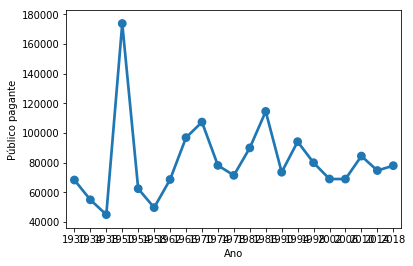

In [11]:
# Exibindo o gprafico de linhas com marcação em cada ponto
sns.pointplot(x="Ano", y="Público pagante", data=df)

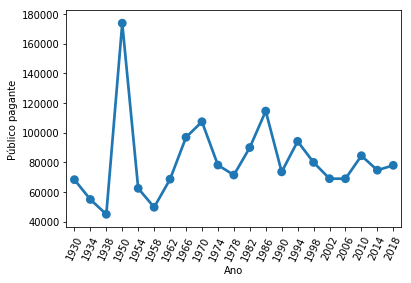

In [13]:
#Ajustando as legendas
sns.pointplot(x="Ano", y="Público pagante", data=df)
plt.xticks(rotation=65)
plt.show()